Use cancer dataset. Create a binary classification model using SVM classifier.  


In [1]:
#Importing breast cancer dataset
import pandas as pd
df_cancer=pd.read_csv("https://raw.githubusercontent.com/kajalpanda1/DatasetRepository/master/Breast_Cancer_Dataset.csv")

In [2]:
#Retrieving first five records of the dataset
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#Extracting feature and target sets
feature_df=df_cancer.drop(columns=['id','Unnamed: 32','diagnosis']) 
target_df=df_cancer['diagnosis']

In [4]:
feature_df.shape

(569, 30)

In [5]:
target_df.shape

(569,)

In [6]:
#Standardizing the features of the dataset
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
feature_df=ss.fit_transform(feature_df)

In [7]:
#Splitting titanic dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feature_df,target_df,test_size=0.15,random_state=30)

In [12]:
#Implementing SVM classifier
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
#Training and testing accuracies for svm classifier
print('Training Accuracy:',round(model_svc.score(x_train,y_train)*100,4))
print('Testing Accuracy:',round(model_svc.score(x_test, y_test)*100,4))

Training Accuracy: 98.5507
Testing Accuracy: 98.8372


In [14]:
#Predicting test instances with svm classifier
y_pred=model_svc.predict(x_test)

In [15]:
#Classification report for svm classifier model
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.98      1.00      0.99        52
           M       1.00      0.97      0.99        34

    accuracy                           0.99        86
   macro avg       0.99      0.99      0.99        86
weighted avg       0.99      0.99      0.99        86



In [19]:
#Confusion matrix for svm classifier model
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_mat=pd.DataFrame(cm,index=['Cancer','Healthy'],columns=['PredictedCancer','PredictedHealthy'])
conf_mat

,PredictedCancer,PredictedHealthy
Cancer,52,0
Healthy,1,33


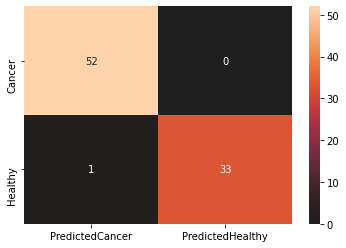

In [24]:
#Plotting conusion matrix using heatmap
import seaborn as sns
sns.heatmap(conf_mat, annot=True, center=0)